In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import plotly.express as px
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")


Mounted at /content/gdrive


In [65]:
df = pd.read_csv('/content/gdrive/My Drive/healthcare_dataset.csv')
df.head()

Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Emergency   
2           Medicare    36874.896997          292      Emergency   
3           Medicare    23303.322092          480         Urgent   
4   UnitedHealthcare    18086.344184          477         Urgent   

  Discharge Date   Medication  Test Results  
0     2022-12-01      Aspirin  Inconclusive  
1     2023-06-15      Lipitor        Normal  
2     2019-02-08      Lipitor        Normal  
3     2020-05-03   Penicillin      Abnormal  
4     2021-08-02  Paracetamol        Normal

In [66]:
df.isnull()

Name    Age  Gender  Blood Type  Medical Condition  Date of Admission  \
0     False  False   False       False              False              False   
1     False  False   False       False              False              False   
2     False  False   False       False              False              False   
3     False  False   False       False              False              False   
4     False  False   False       False              False              False   
...     ...    ...     ...         ...                ...                ...   
9995  False  False   False       False              False              False   
9996  False  False   False       False              False              False   
9997  False  False   False       False              False              False   
9998  False  False   False       False              False              False   
9999  False  False   False       False              False              False   

      Doctor  Hospital  Insurance Provider  Billing Amount  Room Number  \
0      False     False               False           False        False   
1      False     False               False           False        False   
2      False     False               False           False        False   
3      False     False               False           False        False   
4      False     False               False           False        False   
...      ...       ...                 ...             ...          ...   
9995   False     False               False           False        False   
9996   False     False               False           False        False   
9997   False     False               False           False        False   
9998   False     False               False           False        False   
9999   False     False               False           False        False   

      Admission Type  Discharge Date  Medication  Test Results  
0              False           False       False         False  
1              False           False       False         False  
2              False           False       False         False  
3              False           False       False         False  
4              False           False       False         False  
...              ...             ...         ...           ...  
9995           False           False       False         False  
9996           False           False       False         False  
9997           False           False       False         False  
9998           False           False       False         False  
9999           False           False       False         False  

[10000 rows x 15 columns]

In [67]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    df[date] = pd.to_datetime(df[date])
#calculate the no: of days patients got admitted in hospital
df['Days Hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Days Hospitalized'] = df['Days Hospitalized'].astype(int)
df['Days Hospitalized']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Days Hospitalized, Length: 10000, dtype: int64

In [68]:
df.head()

Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Emergency   
2           Medicare    36874.896997          292      Emergency   
3           Medicare    23303.322092          480         Urgent   
4   UnitedHealthcare    18086.344184          477         Urgent   

  Discharge Date   Medication  Test Results  Days Hospitalized  
0     2022-12-01      Aspirin  Inconclusive                 14  
1     2023-06-15      Lipitor        Normal                 14  
2     2019-02-08      Lipitor        Normal                 30  
3     2020-05-03   Penicillin      Abnormal                  1  
4     2021-08-02  Paracetamol        Normal                 24

In [69]:
# prompt: what is the highest value in column Days Hospitalized

df['Days Hospitalized'].max()


30

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  object     

In [71]:
df.describe()

Age  Billing Amount   Room Number  Days Hospitalized
count  10000.000000    10000.000000  10000.000000       10000.000000
mean      51.452200    25516.806778    300.082000          15.561800
std       19.588974    14067.292709    115.806027           8.612038
min       18.000000     1000.180837    101.000000           1.000000
25%       35.000000    13506.523967    199.000000           8.000000
50%       52.000000    25258.112566    299.000000          16.000000
75%       68.000000    37733.913727    400.000000          23.000000
max       85.000000    49995.902283    500.000000          30.000000

In [72]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    df[date] = pd.to_datetime(df[date])
#calculate the no: of days patients got admitted in hospital
df['Days Hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['Days Hospitalized'] = df['Days Hospitalized'].astype(int)
df['Days Hospitalized']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Days Hospitalized, Length: 10000, dtype: int64

In [73]:
df.head()

Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Emergency   
2           Medicare    36874.896997          292      Emergency   
3           Medicare    23303.322092          480         Urgent   
4   UnitedHealthcare    18086.344184          477         Urgent   

  Discharge Date   Medication  Test Results  Days Hospitalized  
0     2022-12-01      Aspirin  Inconclusive                 14  
1     2023-06-15      Lipitor        Normal                 14  
2     2019-02-08      Lipitor        Normal                 30  
3     2020-05-03   Penicillin      Abnormal                  1  
4     2021-08-02  Paracetamol        Normal                 24

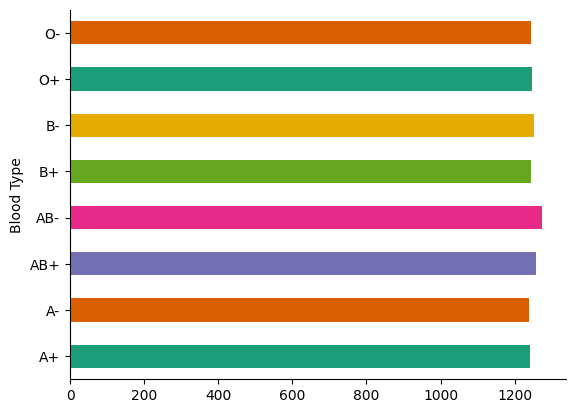

In [74]:
# @title Blood Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Blood Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

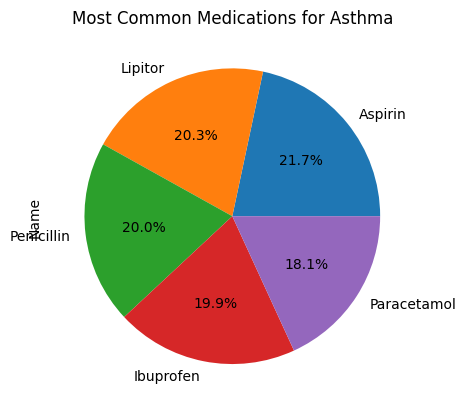

In [75]:
# @title Most Common Medications for Asthma

df[df['Medical Condition'] == 'Asthma'].groupby('Medication')['Name'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
_ = plt.title('Most Common Medications for Asthma')

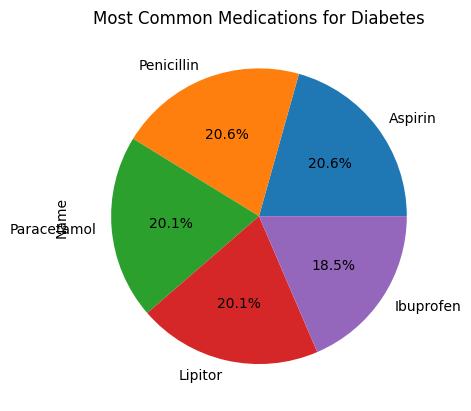

In [76]:
# @title Most Common Medications for Diabetes

df[df['Medical Condition'] == 'Diabetes'].groupby('Medication')['Name'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
_ = plt.title('Most Common Medications for Diabetes')

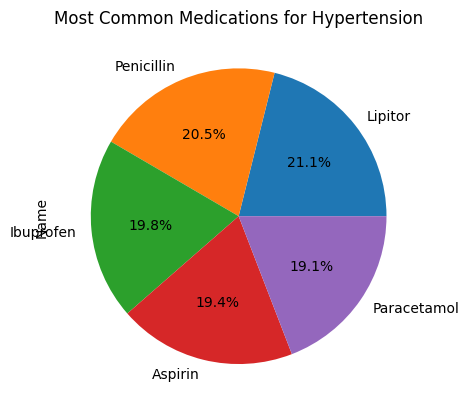

In [77]:
# @title Most Common Medications for Hypertension

df[df['Medical Condition'] == 'Hypertension'].groupby('Medication')['Name'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
_ = plt.title('Most Common Medications for Hypertension')

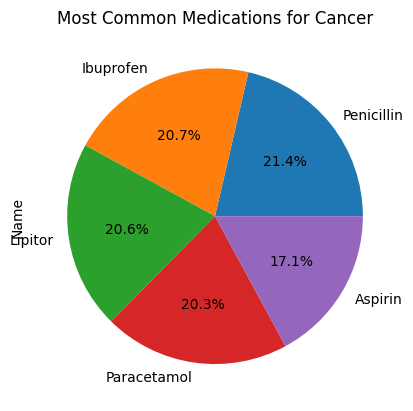

In [78]:
# @title Most Common Medications for Cancer

df[df['Medical Condition'] == 'Cancer'].groupby('Medication')['Name'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%')
_ = plt.title('Most Common Medications for Cancer')

<Axes: title={'center': 'Days Hospitalized'}, xlabel='Admission Type'>

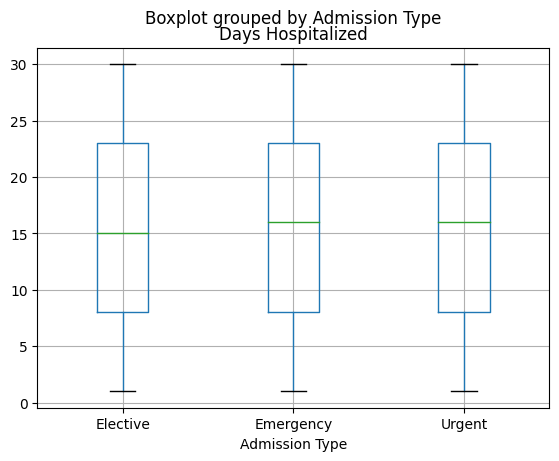

In [79]:
# @title Duration of Hospitalization by Admission Type

df.boxplot(column='Days Hospitalized', by='Admission Type')

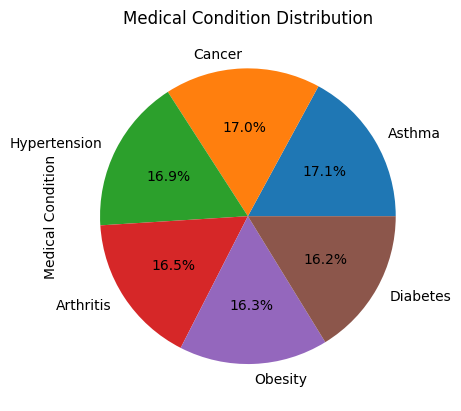

In [80]:
# @title Medical Condition Distribution

import matplotlib.pyplot as plt
df['Medical Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
_ = plt.title('Medical Condition Distribution')

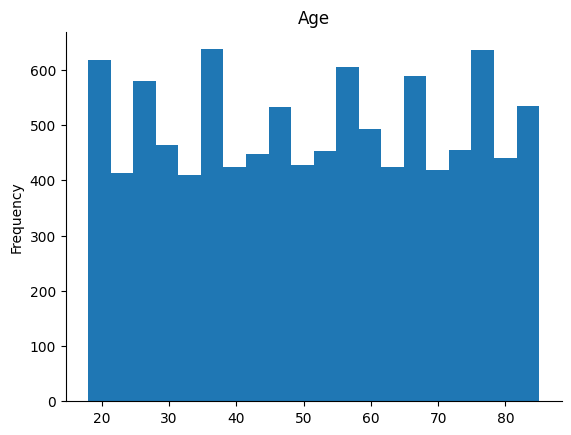

In [81]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

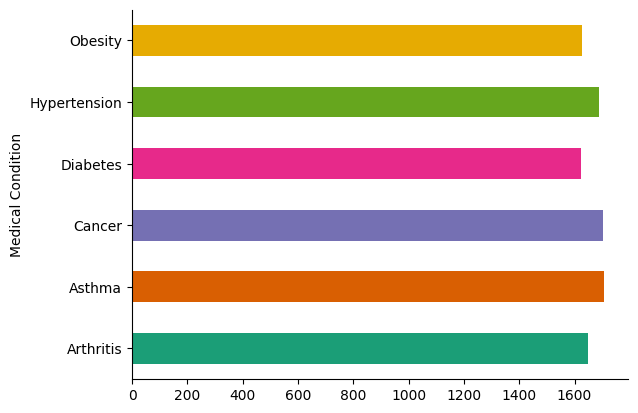

In [82]:
# @title Medical Condition

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Medical Condition').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

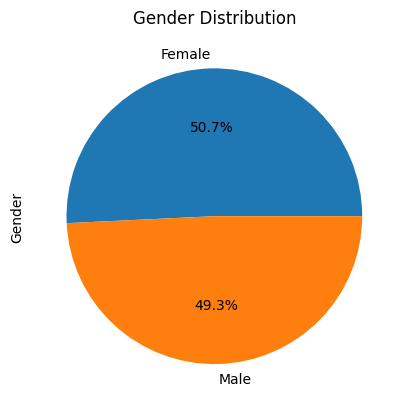

In [83]:
# @title Distribution of Patients by Gender

import matplotlib.pyplot as plt
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
_ = plt.title('Gender Distribution')

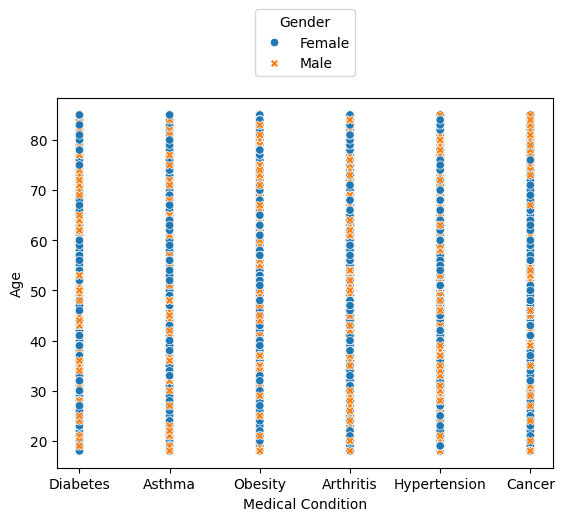

In [84]:
sns.scatterplot(data=df,x="Medical Condition", y="Age",hue="Gender",style="Gender")
plt.legend(bbox_to_anchor=(.5, 1.15),loc='center', title='Gender')
plt.show()

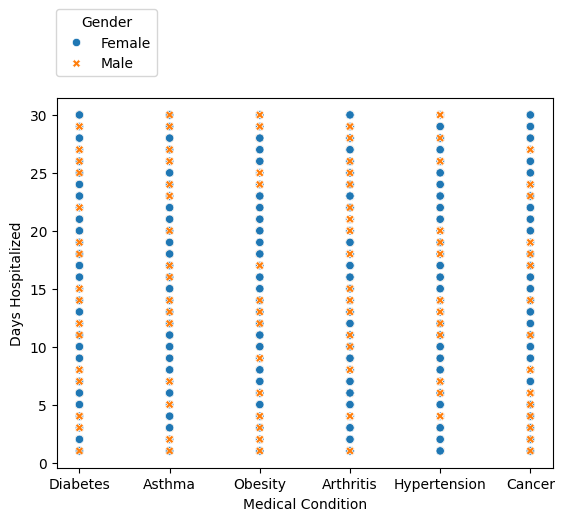

In [85]:
sns.scatterplot(data=df,x="Medical Condition", y="Days Hospitalized",hue="Gender",style="Gender")
plt.legend(bbox_to_anchor=(.1, 1.15),loc='center', title='Gender')
plt.show()

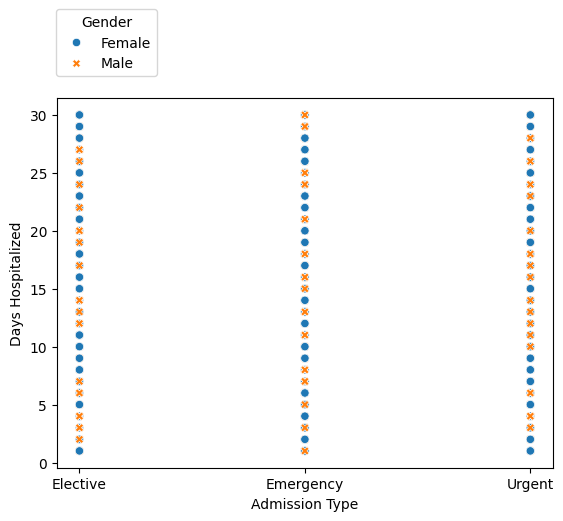

In [86]:
sns.scatterplot(data=df,x="Admission Type", y="Days Hospitalized",hue="Gender",style="Gender")
plt.legend(bbox_to_anchor=(.1, 1.15),loc='center', title='Gender')
plt.show()

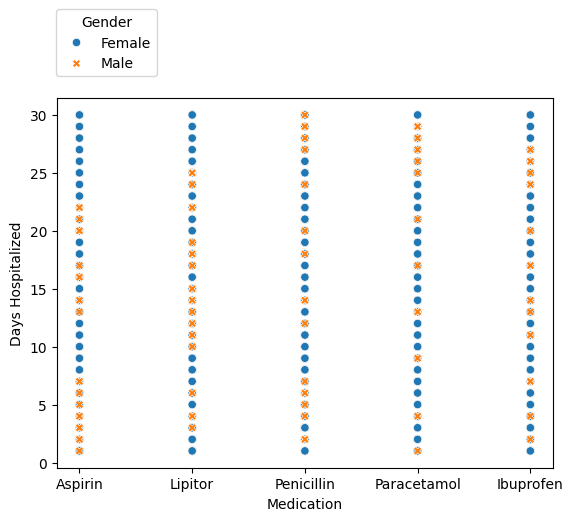

In [87]:
sns.scatterplot(data=df,x="Medication", y="Days Hospitalized",hue="Gender",style="Gender")
plt.legend(bbox_to_anchor=(.1, 1.15),loc='center', title='Gender')
plt.show()

In [88]:
# prompt: drop Doctor and	Hospital

df.drop(['Doctor', 'Hospital', 'Name', 'Blood Type', 'Date of Admission', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Discharge Date',   ], axis=1, inplace=True)


In [89]:
df.head()

Age  Gender Medical Condition Admission Type   Medication  Test Results  \
0   81  Female          Diabetes       Elective      Aspirin  Inconclusive   
1   35    Male            Asthma      Emergency      Lipitor        Normal   
2   61    Male           Obesity      Emergency      Lipitor        Normal   
3   49    Male            Asthma         Urgent   Penicillin      Abnormal   
4   51    Male         Arthritis         Urgent  Paracetamol        Normal   

   Days Hospitalized  
0                 14  
1                 14  
2                 30  
3                  1  
4                 24

In [90]:
# prompt: change the categorical values in gender column to read 0 and 1 representing Female and Male respectively

df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


In [91]:
df.head()

Age  Gender Medical Condition Admission Type   Medication  Test Results  \
0   81       0          Diabetes       Elective      Aspirin  Inconclusive   
1   35       1            Asthma      Emergency      Lipitor        Normal   
2   61       1           Obesity      Emergency      Lipitor        Normal   
3   49       1            Asthma         Urgent   Penicillin      Abnormal   
4   51       1         Arthritis         Urgent  Paracetamol        Normal   

   Days Hospitalized  
0                 14  
1                 14  
2                 30  
3                  1  
4                 24

In [92]:
# prompt: list all the unique values in medical condition column

df['Medical Condition'].unique()


array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

In [93]:
# prompt: change the categorical values in Medical Condition column to read 0,1,2,3,4,5, and 6 representing Diabetes, Asthma, Obesity, Hypertension, and Cancer, Arthritis,

df['Medical Condition'] = df['Medical Condition'].replace({'Diabetes': 0, 'Asthma': 1, 'Obesity': 2, 'Hypertension': 3, 'Cancer': 4, 'Arthritis': 5, 'Other': 6})

df.head()


Age  Gender  Medical Condition Admission Type   Medication  Test Results  \
0   81       0                  0       Elective      Aspirin  Inconclusive   
1   35       1                  1      Emergency      Lipitor        Normal   
2   61       1                  2      Emergency      Lipitor        Normal   
3   49       1                  1         Urgent   Penicillin      Abnormal   
4   51       1                  5         Urgent  Paracetamol        Normal   

   Days Hospitalized  
0                 14  
1                 14  
2                 30  
3                  1  
4                 24

In [94]:
df['Admission Type'].unique()

array(['Elective', 'Emergency', 'Urgent'], dtype=object)

In [95]:
# prompt: change the categorical values in Medical Condition column to read 0,1,2,3,4,5, and 6 representing Diabetes, Asthma, Obesity, Hypertension, and Cancer, Arthritis,

df['Admission Type'] = df['Admission Type'].replace({'Elective': 0, 'Emergency': 1, 'Urgent': 2})

df.head()


Age  Gender  Medical Condition  Admission Type   Medication  Test Results  \
0   81       0                  0               0      Aspirin  Inconclusive   
1   35       1                  1               1      Lipitor        Normal   
2   61       1                  2               1      Lipitor        Normal   
3   49       1                  1               2   Penicillin      Abnormal   
4   51       1                  5               2  Paracetamol        Normal   

   Days Hospitalized  
0                 14  
1                 14  
2                 30  
3                  1  
4                 24

In [96]:
df['Medication'].unique()

array(['Aspirin', 'Lipitor', 'Penicillin', 'Paracetamol', 'Ibuprofen'],
      dtype=object)

In [97]:
df['Medication'] = df['Medication'].replace({'Aspirin': 0, 'Lipitor': 1, 'Penicillin': 2, 'Paracetamol': 3, 'Ibuprofen': 4})

df.head()

Age  Gender  Medical Condition  Admission Type  Medication  Test Results  \
0   81       0                  0               0           0  Inconclusive   
1   35       1                  1               1           1        Normal   
2   61       1                  2               1           1        Normal   
3   49       1                  1               2           2      Abnormal   
4   51       1                  5               2           3        Normal   

   Days Hospitalized  
0                 14  
1                 14  
2                 30  
3                  1  
4                 24

In [98]:
df['Test Results'].unique()


array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

In [99]:
df['Test Results'] = df['Test Results'].replace({'Inconclusive': 0, 'Normal': 1, 'Abnormal': 2})

df.head()

Age  Gender  Medical Condition  Admission Type  Medication  Test Results  \
0   81       0                  0               0           0             0   
1   35       1                  1               1           1             1   
2   61       1                  2               1           1             1   
3   49       1                  1               2           2             2   
4   51       1                  5               2           3             1   

   Days Hospitalized  
0                 14  
1                 14  
2                 30  
3                  1  
4                 24

In [100]:
# prompt: Define target variable as Test Results

df['target'] = df['Test Results']
df.drop('Test Results', axis=1, inplace=True)


In [101]:
df.head()

Age  Gender  Medical Condition  Admission Type  Medication  \
0   81       0                  0               0           0   
1   35       1                  1               1           1   
2   61       1                  2               1           1   
3   49       1                  1               2           2   
4   51       1                  5               2           3   

   Days Hospitalized  target  
0                 14       0  
1                 14       1  
2                 30       1  
3                  1       2  
4                 24       1

In [106]:
# prompt: standardize column Age and Days Hospitalized to fit within the range of other columns

from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit the scaler to the data
scaler.fit(df[['Age', 'Days Hospitalized']])

# transform the data
df[['Age', 'Days Hospitalized']] = scaler.transform(df[['Age', 'Days Hospitalized']])

# check the transformed data
df.head()


Age  Gender  Medical Condition  Admission Type  Medication  \
0  1.508465       0                  0               0           0   
1 -0.839912       1                  1               1           1   
2  0.487431       1                  2               1           1   
3 -0.125189       1                  1               2           2   
4 -0.023086       1                  5               2           3   

   Days Hospitalized  target  
0          -0.181360       0  
1          -0.181360       1  
2           1.676598       1  
3          -1.690950       2  
4           0.979864       1

In [107]:
# prompt: split the dataset

from sklearn.model_selection import train_test_split

# Separate features and target
features = df.drop('target', axis=1)
target = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (7500, 6)
y_train shape: (7500,)
X_test shape: (2500, 6)
y_test shape: (2500,)


In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# Initialize the model (you can replace LinearRegression with any other model you want to use)
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) for both training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Print the MSE scores
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 0.6743034177933885
Testing MSE: 0.6687525790607156


In [117]:
regressor.fit(X_train, y_train)

LinearRegression()

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)




-0.003990453038252628

In [119]:
model.score(X_test, y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.